In [1]:
import warnings
import torch
import torch.utils.data
import torchvision
import cv2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn


from torchvision import transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
from tqdm import tqdm

from pathlib import Path

from PIL import Image, ImageOps

In [11]:
BATCH_SIZE = 256
EPOCHS = 32

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [12]:
desired_size = (56, 56)

In [13]:
# the training transforms
train_transform = transforms.Compose([
    transforms.Resize(desired_size),
    transforms.Grayscale(1)
    
])


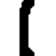

In [14]:
dataset = torchvision.datasets.ImageFolder('T:\my_programs\Math_recognition\TRAIN\images_contrast_to224', transform=train_transform)
display(dataset[112][0])

In [15]:
classes_dict = dataset.class_to_idx
classes = []
for key in classes_dict.keys():
    classes.append(str(key))
classes.sort()
#classes

In [16]:
# classes = ['!', '(', ')', '+', ',', '-', 
#            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 
#            'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 
#            'alpha', 'ascii_124', 'b', 'beta', 'chi', 'cos', 'd', 'div', 'e', 'exists', 
#            'f', 'forall', 'forward_slash', 'gamma', 'geq', 'greater', 'gt', 
#            'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 
#            'lim', 'log', 'lt', 'mu', 'neq', 'o', 'omega', 'p', 'phi', 'pi', 'pm', 'prime', 
#            'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 
#            'u', 'upsilon', 'v', 'w', 'y', 'z', '{', '}']

NUM_CLASSES = len(classes)

def map_pred(ind):
    if ind < NUM_CLASSES:
        return classes[ind]
    return 'ERROR MAPPIMG'
NUM_CLASSES

40

In [17]:
train_loader = torch.utils.data.DataLoader(
    dataset, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=6, pin_memory=True
)


In [22]:
def resize():
    path = "TRAIN/images_resized_to"+str(desired_size[0])+"/"
    counter = 0
    for p in tqdm(dataset, total=int(len(dataset))):
        true_name = map_pred(p[1])
        Path(path + true_name).mkdir(parents=True, exist_ok=True)
        
        #image = np.array(p[0])
        #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #thresh = 250
        #ret, thresh_img = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
        #img_erode = cv2.erode(thresh_img, np.ones((3, 3), np.uint8), iterations=1)
        
        #cv2.imwrite(path + true_name + '/' + str(counter)+'.jpg', img_erode)
        #rotated.save(path + true_name + '/' + str(counter)+'.jpg')
        train_transform(p[0]).save(path + true_name +'/' + str(counter)+'.jpg')
        counter+=1


In [23]:
resize()

100%|██████████| 338219/338219 [21:57<00:00, 256.78it/s]


In [19]:
def dummy():
    counter = 0
    true_name = ''
    classes = []
    for p in dataset:
        #print(p)
        true_name1 = str(p[1])#map_pred(p[1])
        if true_name != true_name1:
            true_name = true_name1
            classes.append(true_name)
            Path("dummy"+str(desired_size[0])+"/"+true_name).mkdir(parents=True, exist_ok=True)
            p[0].save("dummy"+str(desired_size[0])+"/" + true_name + '/' + str(counter)+'.jpg')
            
        if counter % 1000 == 0:
            print(len(dataset)-counter)
        #Path("new/"+str(p[1])).mkdir(parents=True, exist_ok=True)
        #torch.save(p[0], 'new/'+str(p[1]) + str(counter)+'.jpg')
        counter+=1
    return classes

In [20]:
def add_contrast(x, factor):
    return transforms.functional.adjust_contrast(x, factor)

In [21]:
def contrast():
    path = "images_contrast_to"+str(desired_size[0])+"/"
    counter = 0
    for p in tqdm(dataset, total=int(len(dataset))):
        true_name = map_pred(p[1])
        Path(path + true_name).mkdir(parents=True, exist_ok=True)
        
        #display(p[0])
        image = add_contrast(p[0], 3)
        
        #display(image)
        
        image.save(path + true_name + '/' + str(counter)+'.jpg')
#         Path("new/"+str(p[1])).mkdir(parents=True, exist_ok=True)
#         torch.save(p[0], 'new/'+str(p[1]) + str(counter)+'.jpg')
        counter+=1

In [22]:
contrast()

100%|███████████████████████████████████████████████████████████████████████████████| 173/173 [00:01<00:00, 139.67it/s]


In [51]:
import os

root, dirs, files = os.walk("F:\my_programs\python\image_recognition\\all_dataset").__next__()

dirs.sort()
print(dirs)

['(', ')', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'F', 'X', 'Y', 'Z', 'alpha', 'and', 'beta', 'delta', 'exists', 'forall', 'gamma', 'lambda', 'mu', 'not', 'omega', 'or', 'phi', 'pi', 'psi', 'rightarrow', 'sigma', 'tau', 'theta', 'upsilon']


In [ ]:
class MathNet(torch.nn.Module):
    def __init__(self):
        super(MathNet, self).__init__()
        self.dropout_percentage = 0.25
        
        #Block 1     in: 28x28x1
        #Block 1    out: 14x14x64
        self.conv1_1 = torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.bn1_1 = torch.nn.BatchNorm2d(num_features=64)
        self.conv1_2 = torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn1_2 = torch.nn.BatchNorm2d(num_features=64)
        self.conv1_3 = torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn1_3 = torch.nn.BatchNorm2d(num_features=64)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.dropout1 = nn.Dropout(p=self.dropout_percentage)
        
        #Block 2     in: 14x14x64
        #Block 2    out: 7x7x128
        self.conv2_1 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn2_1 = torch.nn.BatchNorm2d(num_features=128)
        self.conv2_2 = torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn2_2 = torch.nn.BatchNorm2d(num_features=128)
        self.conv2_3 = torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn2_3 = torch.nn.BatchNorm2d(num_features=128)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.dropout2 = nn.Dropout(p=self.dropout_percentage)
        
        #Block 2     in: 7x7x128
        #Block 2    out: 1x1x256
        self.conv3_1 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn3_1 = torch.nn.BatchNorm2d(num_features=256)
        self.conv3_2 = torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.bn3_2 = torch.nn.BatchNorm2d(num_features=256)
        self.conv3_3 = torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.bn3_3 = torch.nn.BatchNorm2d(num_features=256)
        self.act3  = torch.nn.ReLU()
        self.pool3 = torch.nn.AvgPool2d(kernel_size=7, stride=7, padding=0)
        self.dropout3 = nn.Dropout(p=self.dropout_percentage)
        
        self.fc1 = torch.nn.Linear(256, NUM_CLASSES)
    
    def forward(self, x):
        
        x = self.conv1_1(x)
        x = self.bn1_1(x)
        x = self.conv1_2(x)
        x = self.bn1_2(x)
        x = self.conv1_3(x)
        x = self.bn1_3(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2_1(x)
        x = self.bn2_1(x)
        x = self.conv2_2(x)
        x = self.bn2_2(x)
        x = self.conv2_3(x)
        x = self.bn2_3(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = self.conv3_1(x)
        x = self.bn3_1(x)
        x = self.conv3_2(x)
        x = self.bn3_2(x)
        x = self.conv3_3(x)
        x = self.bn3_3(x)
        x = self.act3(x)
        x = self.pool3(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)  
        return x